In [ ]:
!pip install rdkit-pypi
!pip install pandas
!pip install PubChemPy
!pip install py3dmol
!pip install pyxtal
!pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PubChemPy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=98f5a13c650ae29520e4421f5c2de7ecc3c62e218cedf55a0ed217b5bd5a8229
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built PubChemPy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
#1-CONVERTING MOLECULAR FORMULA INTO SMILES

from rdkit import Chem
from rdkit.Chem import AllChem
import pubchempy as pcp

def generate_isomers(molecular_formula):
    try:
        compound = pcp.get_compounds(molecular_formula, 'formula')[0]
        canonical_smiles = compound.canonical_smiles

        # Generate a molecular structure from the canonical SMILES
        mol = Chem.MolFromSmiles(canonical_smiles)
        if mol is None:
            raise ValueError("Invalid canonical SMILES")

        # Generate isomeric SMILES representations
        isomeric_mols = AllChem.EnumerateStereoisomers(mol)
        isomeric_smiles_list = [Chem.MolToSmiles(isomeric, isomericSmiles=True) for isomeric in isomeric_mols]

        return isomeric_smiles_list
    except IndexError:
        raise ValueError("Invalid molecular formula")

try:
    user_input_formula = input("Enter a molecular formula: ")
    isomeric_smiles_list = generate_isomers(user_input_formula)
    print("Generated isomeric SMILES representations:")
    for isomeric_smiles in isomeric_smiles_list:
        print(isomeric_smiles)
except ValueError as ve:
    print(ve)


Enter a molecular formula: C7H5N3O6
Generated isomeric SMILES representations:
Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-]


Enter a SMILES string: CC(=O)NC1=NN=C(S1)S(=O)(=O)N
Molecule Name: acetazolamide
Bond Information:
Bond between 0 & 1: SINGLE
Bond between 1 & 2: DOUBLE
Bond between 1 & 3: SINGLE
Bond between 3 & 4: SINGLE
Bond between 4 & 5: AROMATIC
Bond between 5 & 6: AROMATIC
Bond between 6 & 7: AROMATIC
Bond between 7 & 8: AROMATIC
Bond between 7 & 9: SINGLE
Bond between 9 & 10: DOUBLE
Bond between 9 & 11: DOUBLE
Bond between 9 & 12: SINGLE
Bond between 8 & 4: AROMATIC
Functional Groups:
- Alkane
- Aromatic
Atom Information:
Atom 0: C
Atom 1: C
Atom 2: O
Atom 3: N
Atom 4: C
Atom 5: N
Atom 6: N
Atom 7: C
Atom 8: S
Atom 9: S
Atom 10: O
Atom 11: O
Atom 12: N


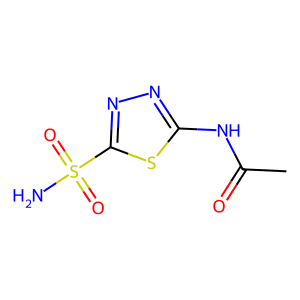

Number of NO2 groups: 0
Number of NH2 groups: 1
Number of H groups: 0


In [ ]:
#2-ALKANE , ALKENE , ALKYNE , BOND INFORMATION , AROMATIC OR NOT , PRESENCE AND COUNT OF -NO2 , -H AND -NH2 GROUPS , 2D STRUCUTRE

import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

def get_molecule_name(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    if molecule:
        compound = pcp.get_compounds(smiles, 'smiles')[0]
        common_name = compound.synonyms[0] if compound.synonyms else "Unknown"
        return common_name
    else:
        return "Invalid SMILES"


def get_functional_groups(molecule):
    functional_groups = []

    # Check for alkane
    if molecule.HasSubstructMatch(Chem.MolFromSmarts('[C,c]-[C,c]')):
        functional_groups.append("Alkane")

    # Check for alkene
    if molecule.HasSubstructMatch(Chem.MolFromSmarts('[C,c]=C')):
        functional_groups.append("Alkene")

    # Check for alkyne
    if molecule.HasSubstructMatch(Chem.MolFromSmarts('[C,c]#C')):
        functional_groups.append("Alkyne")

    if molecule.HasSubstructMatch(Chem.MolFromSmarts('a')):  # 'a' represents an aromatic atom
      functional_groups.append("Aromatic")

    return functional_groups


def process_smiles(smiles):
    molecule_name = get_molecule_name(smiles)
    print(f"Molecule Name: {molecule_name}")

    molecule = Chem.MolFromSmiles(smiles)
    if molecule:
        bonds = molecule.GetBonds()
        if bonds:
            print("Bond Information:")
            for bond in bonds:
                print(f"Bond between {bond.GetBeginAtomIdx()} & {bond.GetEndAtomIdx()}: {bond.GetBondType()}")
        else:
            print("No bonds")

        functional_groups = get_functional_groups(molecule)
        if functional_groups:
            print("Functional Groups:")
            for group in functional_groups:
                print(f"- {group}")

        atoms = molecule.GetAtoms()
        print("Atom Information:")
        for atom in atoms:
            print(f"Atom {atom.GetIdx()}: {atom.GetSymbol()}")

        img_2d = Draw.MolToImage(molecule, size=(300, 300))
        display(img_2d)


    else:
        print("Failed to create a molecule")



# Prompt the user to input a SMILES string
user_input_smiles = input("Enter a SMILES string: ")

# Call the function with the user input
process_smiles(user_input_smiles)


def count_specific_substituents(smiles):
    substituents = ["[N+](=O)[O-]", "[NH2]", "[H]"]
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    counts = {substituent: 0 for substituent in substituents}
    for substituent in substituents:
        matches = mol.GetSubstructMatches(Chem.MolFromSmarts(substituent))
        counts[substituent] = len(matches)

    return counts


# Call the function with the user input
substituent_counts = count_specific_substituents(user_input_smiles)
print("Number of NO2 groups:", substituent_counts["[N+](=O)[O-]"])
print("Number of NH2 groups:", substituent_counts["[NH2]"])
print("Number of H groups:", substituent_counts["[H]"])



Enter a SMILES string: CC(=O)NC1=NN=C(S1)S(=O)(=O)N
Molecule Name: acetazolamide
Bond Information:
Bond between 0 & 1: SINGLE
Bond between 1 & 2: DOUBLE
Bond between 1 & 3: SINGLE
Bond between 3 & 4: SINGLE
Bond between 4 & 5: AROMATIC
Bond between 5 & 6: AROMATIC
Bond between 6 & 7: AROMATIC
Bond between 7 & 8: AROMATIC
Bond between 7 & 9: SINGLE
Bond between 9 & 10: DOUBLE
Bond between 9 & 11: DOUBLE
Bond between 9 & 12: SINGLE
Bond between 8 & 4: AROMATIC
Functional Groups:
- Alkane
- Aromatic
Atom Information:
Atom 0: C
Atom 1: C
Atom 2: O
Atom 3: N
Atom 4: C
Atom 5: N
Atom 6: N
Atom 7: C
Atom 8: S
Atom 9: S
Atom 10: O
Atom 11: O
Atom 12: N


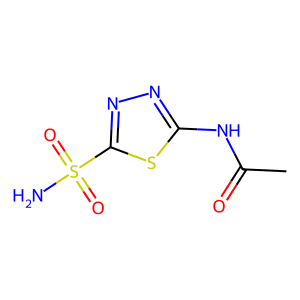

In [ ]:
#3-GENERATE 2D STRUCTURE AND IT'S 3-D COORDINATES IN A SDF FILE

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles(user_input_smiles )
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

# Simple 2D depiction
img = Draw.MolToImage(mol)
img.show()

filename = "molecule.sdf"
writer = Chem.SDWriter(filename)
writer.write(mol)
writer.close()

user_input_smiles = input("Enter a SMILES string: ")
process_smiles(user_input_smiles)

In [ ]:
#4-GENERATE 3-D STRUCTURE OF 2-D COMPOUND USING CORODINATES FROM THE SDF FILE GENERATED ABOVE

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PyMol
import py3Dmol

# Read molecule from SDF
sdf_path = 'molecule.sdf'
suppl = Chem.SDMolSupplier(sdf_path)
mol = next(suppl)

# Use Py3Dmol for visualization
mb = Chem.MolToMolBlock(mol)
view = py3Dmol.view(width=400, height=400)
view.addModel(mb, 'mol')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#4-PLANER AND NON PLANER

from rdkit import Chem
from rdkit.Chem import AllChem

def is_planar(mol):
    rings = mol.GetRingInfo().AtomRings()
    for ring in rings:
        if len(ring) >= 5:  # Consider only rings with 5 or more atoms

            # Calculate the torsion angles between consecutive atoms in the ring
            torsion_angles = []
            for i in range(len(ring) - 3):
                atom_indices = ring[i:i+4]
                torsion_angle = Chem.rdMolTransforms.GetDihedralDeg(mol.GetConformer(), *atom_indices)
                torsion_angles.append(torsion_angle)

            # Clearly if all of the four atoms were to lie in a plane, then the torsion angle χ is 0° or 180°,
            # depending on whether the first and fourth atoms are in a cis or trans relationship with respect to the middle bond, respectively.


            if all(abs(angle) < 30 or abs(angle - 180) < 30 for angle in torsion_angles):
                return True
    return False

user_input_smiles = input("Enter a SMILES string: ")
mol = Chem.MolFromSmiles(user_input_smiles)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Check if the molecule is planar
if is_planar(mol):
    print("The molecule is planar.")
else:
    print("The molecule is non-planar.")

Enter a SMILES string: CC(=O)NC1=NN=C(S1)S(=O)(=O)N
The molecule is planar.


In [ ]:
#4-PLANAR AND NON-PLANAR

from rdkit import Chem
from rdkit.Chem import AllChem, rdMolTransforms

def check_planarity(smiles):
    molecule = Chem.MolFromSmiles(smiles)

    if molecule is None:
        print("Invalid Smiles input.")
        return

    molecule = Chem.AddHs(molecule)
    AllChem.EmbedMolecule(molecule, randomSeed=42)

    has_non_planar_rings = False
    for ring in molecule.GetRingInfo().AtomRings():
        if len(ring) > 3:
            dihedral_angles = []
            for i in range(len(ring) - 3):
                dihedral = rdMolTransforms.GetDihedralDeg(
                    molecule.GetConformer(), ring[i], ring[i + 1], ring[i + 2], ring[i + 3]
                )
                dihedral_angles.append(dihedral)
            planarity_threshold = 10.0
            has_non_planar_rings |= any(
                abs(angle) > planarity_threshold for angle in dihedral_angles
            )

    if has_non_planar_rings:
        print("The molecule is not planar (has non-planar rings).")
        return 'Non-Planar'
    else:
        print("The molecule is planar (no non-planar rings).")
        return 'Planar'

smiles = input("Enter a SMILES string: ")
check_planarity(smiles)


Enter a SMILES string: CC(=O)NC1=NN=C(S1)S(=O)(=O)N
The molecule is planar (no non-planar rings).


'Planar'

In [ ]:
#5-SYMMETRIC AND NON SYMMETRIC

from rdkit import Chem
from rdkit.Chem import AllChem

def is_symmetrical_bond_rotation(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 2D coordinates
    AllChem.Compute2DCoords(mol)

    # Get the first bond in the molecule
    bond = mol.GetBondBetweenAtoms(0, 1)

    # Rotate the bond by 180 degrees
    bond.SetStereo(Chem.BondStereo.STEREOE)

    # Convert the molecule back to SMILES and check if it's the same as the original SMILES
    rotated_smiles = Chem.MolToSmiles(mol)

    if rotated_smiles == smiles:
        print(f"The molecule represented by the SMILES '{smiles}' is symmetrical.")
    else:
        print(f"The molecule represented by the SMILES '{smiles}' is not symmetrical.")

smiles = input("Enter a SMILES string: ")
is_symmetrical_bond_rotation(smiles)


Enter a SMILES string: CC(=O)OCC(=O)OCC(=O)O
The molecule represented by the SMILES 'CC(=O)OCC(=O)OCC(=O)O' is symmetrical.


Enter a smile:  Nc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-]
The molecule is not symmetrical.


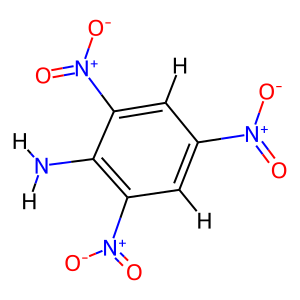

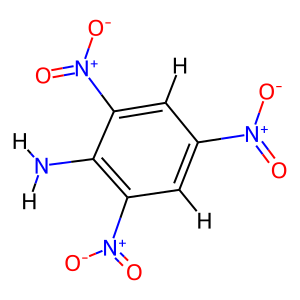

In [ ]:
#6-SYMMETRIC AND NON-SYMMETRIC WITH STRUCTURE

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

def is_symmetrical_bond_rotation(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError("Invalid SMILES string")

    # Generate 2D coordinates
    AllChem.Compute2DCoords(mol)

    # Get the first bond in the molecule
    bond = mol.GetBondBetweenAtoms(0, 1)

    # Rotate the bond by 180 degrees

    bond.SetStereo(Chem.BondStereo.STEREOE)

    # Convert the molecule back to SMILES and check if it's the same as the original SMILES

    rotated_smiles = Chem.MolToSmiles(mol)

    if rotated_smiles == smiles:
       print("The molecule is symmetrical.")
    else:
         print("The molecule is not symmetrical.")



smiles=input("Enter a smile: ")
is_symmetrical_bond_rotation(smiles)


# Draw the 2D image before bond rotation

img_before = Draw.MolToImage(mol)
display(img_before)

# Rotate the bond and draw the 2D image after bond rotation

mol.GetBondBetweenAtoms(0, 1).SetStereo(Chem.BondStereo.STEREOE)
img_after = Draw.MolToImage(mol)
display(img_after)


In [ ]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the molecule from a SMILES string
smiles = "O=[N+]([O-])c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1"  # Example SMILES string
mol = Chem.MolFromSmiles(smiles)

# Generate 3D coordinates
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

# Initialize the viewer
viewer = py3Dmol.view(width=300, height=300)

# Add the molecule with color detection and atom symbols
conf = mol.GetConformer()
for atom in mol.GetAtoms():
    atom_idx = atom.GetIdx()
    pos = conf.GetAtomPosition(atom_idx)
    atomic_num = atom.GetAtomicNum()

    if atomic_num == 6:
        color = 'gray'  # Carbon atoms are colored gray
    elif atomic_num == 8:
        color = 'red'   # Oxygen atoms are colored red
    else:
        color = 'blue'  # Other atoms are colored blue

    viewer.addSphere({'center': {'x': pos.x, 'y': pos.y, 'z': pos.z},
                      'radius': 0.5, 'color': color})
    viewer.addLabel(atom.GetSymbol(), {'x': pos.x, 'y': pos.y, 'z': pos.z})

# Display the viewer
viewer.zoomTo()
viewer.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#ISOMERS

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

def generate_isomers(smiles):
    try:
        # Generate a molecule from the SMILES string
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError("Invalid SMILES string")

        isomers = []

        # Generate structural isomers
        isomers.extend(generate_structural_isomers(mol))

        # Generate stereoisomers
        isomers.extend(generate_stereoisomers(mol))

        return isomers
    except Exception as e:
        raise ValueError(f"Error generating isomers: {e}")

def generate_structural_isomers(mol):
    isomers = []
    isomeric_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    isomers.append((isomeric_smiles, "Structural"))
    return isomers

def generate_stereoisomers(mol):
    isomers = []
    stereo_mols = AllChem.EnumerateStereoisomers(mol)
    for stereo_mol in stereo_mols:
        isomers.append((Chem.MolToSmiles(stereo_mol, isomericSmiles=True), "Stereoisomer"))
    return isomers

try:
    user_input_smiles = input("Enter a SMILES string: ")
    isomers = generate_isomers(user_input_smiles)
    print("Generated isomers:")
    for isomer, isomer_type in isomers:
        print(f"{isomer_type}: {isomer}")
except ValueError as ve:
    print(ve)


Enter a SMILES string: COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N
Generated isomers:
Structural: COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC
Stereoisomer: COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OC


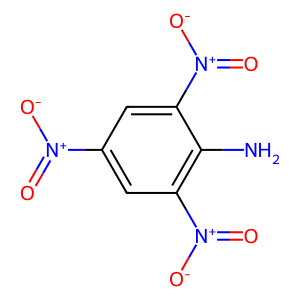

In [ ]:
from rdkit import Chem
from rdkit.Chem.AllChem import EnumerateStereoisomers

# Given SMILES string
smiles = "Nc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1[N+](=O)[O-]"

# Convert SMILES string to RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Generate isomeric SMILES
isomeric_mols = list(EnumerateStereoisomers(mol))

# Convert isomeric SMILES to 2D structures
images = [Chem.Draw.MolToImage(isomer) for isomer in isomeric_mols]

# Draw and display all isomers
for img in images:
    display(img)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

def homo_e(smiles):
    mol = Chem.MolFromSmiles(smiles)
    homo_energy = Descriptors.MolWt(mol)
    print("HOMO Energy:", homo_energy)
    return homo_energy

def pipi_stacking(smiles):
    mol = Chem.MolFromSmiles(smiles)
    aromatic_rings = Chem.GetSSSR(mol)
    homo_energy = Descriptors.MolWt(mol)

    pipi_stacking_potential = len(aromatic_rings) * homo_energy
    print("Aromatic rings:", len(aromatic_rings))
    img = Draw.MolToImage(mol)
    img.show()

    print("pipi Stacking Potential:", pipi_stacking_potential)
    return pipi_stacking_potential

smiles = input("Enter a SMILES string: ")
pipi_stacking(smiles)


Enter a SMILES string: C1=CC(=CC=C1N)S(=O)(=O)N
Aromatic rings: 1
pipi Stacking Potential: 172.20899999999997


172.20899999999997

In [ ]:
#10-explosive or not

from rdkit import Chem

# Given SMILES string
smiles = "[O-]Cl(=O)(=O)=O.[K+]"

# Convert SMILES string to RDKit molecule object
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)
img.show()
# Check for N-NO2 or O-NO2 groups
has_n_no2 = False
has_o_no2 = False

# Loop over atoms in the molecule
for atom in mol.GetAtoms():
    if atom.GetSymbol() == 'N':
        for neighbor in atom.GetNeighbors():
            if neighbor.GetSymbol() == 'O' and neighbor.GetDegree() == 1:
                has_n_no2 = True
                break
    elif atom.GetSymbol() == 'O':
        for neighbor in atom.GetNeighbors():
            if neighbor.GetSymbol() == 'N' and neighbor.GetDegree() == 1:
                has_o_no2 = True
                break

# Check if the compound is used for explosives
if has_n_no2 or has_o_no2:
    print("This compound is used for explosives.")
else:
    print("This compound is not used for explosives.")


This compound is not used for explosives.


In [ ]:
# WRONG CODE

from rdkit import Chem
from rdkit.Chem import AllChem

# Given SMILES string
smiles = "CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O"

# Convert SMILES string to RDKit molecule object
mol = Chem.MolFromSmiles(smiles)

# Generate 3D coordinates
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())

# Calculate partial charges using Gasteiger-Marsili method
AllChem.ComputeGasteigerCharges(mol)

# Find the atoms involved in the nitro group (N-NO2)
nitro_atoms = []
for atom in mol.GetAtoms():
    if atom.GetSymbol() == 'N':
        for neighbor in atom.GetNeighbors():
            if neighbor.GetSymbol() == 'O' and neighbor.GetExplicitValence() == 2:
                nitro_atoms.extend([atom.GetIdx(), neighbor.GetIdx()])

# Calculate the total charge on the nitro group
nitro_charge = sum([float(mol.GetAtomWithIdx(idx).GetProp('_GasteigerCharge')) for idx in nitro_atoms if mol.GetAtomWithIdx(idx).HasProp('_GasteigerCharge')])

# Calculate the ESP charge on the nitro group
nitro_esp_charge = sum([float(mol.GetAtomWithIdx(idx).GetProp('_GasteigerPartialCharge')) for idx in nitro_atoms if mol.GetAtomWithIdx(idx).HasProp('_GasteigerPartialCharge')])

print(f"Total charge on the nitro group: {nitro_charge}")
print(f"ESP charge on the nitro group: {nitro_esp_charge}")


Total charge on the nitro group: 0
ESP charge on the nitro group: 0


In [ ]:
#11-Calculating ESP value from molecular formula/smiles(molecular formula gets converted to smiles)


from rdkit import Chem
from rdkit.Chem import AllChem
import pubchempy as pcp

def generate_isomers(molecular_formula):
    try:
        compound = pcp.get_compounds(molecular_formula, 'formula')[0]
        canonical_smiles = compound.canonical_smiles

        # Generate a molecular structure from the canonical SMILES
        mol = Chem.MolFromSmiles(canonical_smiles)
        if mol is None:
            raise ValueError("Invalid canonical SMILES")

        # Generate isomeric SMILES representations
        isomeric_mols = AllChem.EnumerateStereoisomers(mol)
        isomeric_smiles_list = [Chem.MolToSmiles(isomeric, isomericSmiles=True) for isomeric in isomeric_mols]

        return isomeric_smiles_list
    except IndexError:
        raise ValueError("Invalid molecular formula")

try:
    user_input_formula = input("Enter a molecular formula: ")
    isomeric_smiles_list = generate_isomers(user_input_formula)

    for isomeric_smiles in isomeric_smiles_list:
        mol = Chem.MolFromSmiles(isomeric_smiles)

        if mol is None:
            raise ValueError("Invalid SMILES string")

        # Generate 3D coordinates
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol, AllChem.ETKDG())

        # Calculate partial charges using Gasteiger-Marsili method
        AllChem.ComputeGasteigerCharges(mol)

        # Find the atoms involved in the nitro group (N-NO2)
        nitro_atoms = []
        for atom in mol.GetAtoms():
            if atom.GetSymbol() == 'N':
                for neighbor in atom.GetNeighbors():
                    if neighbor.GetSymbol() == 'O' and neighbor.GetExplicitValence() == 2:
                        nitro_atoms.extend([atom.GetIdx(), neighbor.GetIdx()])

        # Calculate the ESP charge on the nitro group
        nitro_esp_charge = sum([atom.GetDoubleProp('_GasteigerCharge') for atom in mol.GetAtoms() if atom.GetIdx() in nitro_atoms and atom.HasProp('_GasteigerCharge')])

        print(f"Molecular formula: {user_input_formula}")
        print(f"Generated isomeric SMILES: {isomeric_smiles}")
        print(f"ESP charge on the nitro group: {nitro_esp_charge}")
except ValueError as ve:
    print(ve)


Enter a molecular formula: C2H5NH2
Molecular formula: C2H5NH2
Generated isomeric SMILES: CNC
ESP charge on the nitro group: 0
